<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Malm24/blob/main/Semana_5_Data_Analysis_with_Python_(IBM).A01113135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Semana 5: Data Analysis with Python (IBM)
##Marco Antonio López Millán A01113135
##Ciencia y analítica de datos (Gpo 10)
##18/10/2022**

Data Pre-processing: Es el proceso de convertir la data cruda en otro formato para preparar la data para un análisis.

Missing Value: Es cuando no tenemos data en alguna de las observaciones y puede ser representado por "?" "N/A", 0 o una simple celda en blanco.

Soluciones para Missing Values:

Indentificar si es posible recuperar el dato desde su origen
Eliminar la variable u observación 
Reemplazar los valores restantes (promedio, mediana, frecuencia u otras funciones)
No realizar ajustes






dataframes.dropna() sirve para eliminar los missing values

0 elimina la fila
1 elimina la columna

inplace = True permite realizar la modificación directamente en el DF.

dataframe.replace(missing_value, new_value) nos permite reemplazar los missing values

Antes de colocar un valor como la media/promedio debes calcularlo por medio de una formula individual

Ejemplo:
promedio= df["normalized-losses"].mean()

dataframe.replace(np.nan, mean) >>>>>>> de esta manera remplazamos los valores nan por el promedio de la columna.

**Aplicando calculos a una columna **
ejemplo:
df["city-mpg"] = 235/df["City-mpg"]
Para indentificar los tipos de data de un dataframe podemos utilizar

dataframe.dtypes()

Para convertir tipo de dato:
dataframe.astype()

Normalización de datos:
1.- xnew = xold/xmax (scaling)
2.- xnew = (xold-xmin) / (xmax-xmin) (min-max)
3.- xnew = xold - mu / sigma (z-score)

Ejemplo Scaling

df["length"] = df[""length"]/df[""length"].max()


Ejemplo max-min

df["length"] = df[""length"]/(df[""length"].max()-df[""length"].min())

Ejemplo z-score
df["length"] = (df[""length"]-df[""length"].mean())/df[""length"].std()

Binning es agrupar valores en "bins"

Crear binning con el mismo rango de datos

bins = np.linspace(min(df["price"]),max(df["price"]),4)
group_names = ["Low","Medium","High"]
df[prince-binned"]=pd.cut(df["price"], bins, labels=group_names, include_lowest=True)


Dummy Variables Python pandas

ejemplo:

pd.get_dummies(df["fuel"])




In [88]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [89]:
archivo = "/content/auto.csv" #impo

In [90]:
encabezados = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [91]:
df = pd.read_csv(archivo, names = encabezados) #leyendo archivo csv, asignando al df y poniendo encabezados

In [92]:
df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [93]:
df.replace("?", np.nan, inplace = True) #reemplazamos los "?"
df.head(5) #mostramos las primera cinco filas del df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [94]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
for column in missing_data.columns.values.tolist(): #Se crea un for para identificar cuántos datos "verdaderos" existen y estos nos indica el total de missing values
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [96]:
promedio_nl = df["normalized-losses"].astype("float").mean(axis=0) #calculando el promedio de Normalized-losses
print("El promedio de normalized-losses:", promedio_nl) #imprimiendo el valor calculado

El promedio de normalized-losses: 122.0


In [97]:
df["normalized-losses"].replace(np.nan, promedio_nl, inplace=True) #reemplazando los valores nan con el promedio de normalized-losses

In [98]:
promedio_bore=df['bore'].astype('float').mean(axis=0) #calculando promedio
print("promedio de bore:", promedio_bore) #imprimiendo el valor obtenido

promedio de bore: 3.3297512437810943


In [99]:
df["bore"].replace(np.nan, promedio_bore, inplace=True) #reemplazando los nan por el promedio

In [100]:
promedio_stroke=df['stroke'].astype('float').mean(axis=0) #calculando promedio
print("promedio de stroke:", promedio_stroke) #imprimiendo el valor obtenido

promedio de stroke: 3.255422885572139


In [101]:
prom_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("promedio peak rpm:", prom_peakrpm)

promedio peak rpm: 5125.369458128079


In [102]:
df['peak-rpm'].replace(np.nan, prom_peakrpm, inplace=True)

In [103]:
df['num-of-doors'].value_counts() #podemos indentificar cuántos tipos distintos de valores existen y las veces que se repiten

four    114
two      89
Name: num-of-doors, dtype: int64

In [104]:
df['num-of-doors'].value_counts().idxmax() #nos permite indentificar el valor que se repite más

'four'

In [105]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [106]:
df.dropna(subset=["price"], axis=0, inplace=True) #eliminamos todos los nan de la columna precio

df.reset_index(drop=True, inplace=True)

In [107]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [108]:
df.dtypes #revisamos que tipos de datos existen en cada columna

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [109]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float") #convertimos bore y storke a float
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int") #convertimos normalized-losses a int
df[["price"]] = df[["price"]].astype("float") #convertimos price a flot
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float") #convertimos peak-rpm a float

In [110]:
df.dtypes #revisamos nuevamente que tipos de datos existen en cada columna

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [111]:
df['city-L/100km'] = 235/df["city-mpg"]

In [112]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [113]:
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True) #cambiamos el nombre de la columna

In [114]:
df.head() #verificamos el nombre de la columna


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [115]:
df["height"] = df["height"]/df["height"].max() #aplicando scaling a height
df['length'] = df['length']/df['length'].max() #aplicando scaling a height
df['width'] = df['width']/df['width'].max()#aplicando scaling a height

In [116]:
df[["length","width","height"]].head(5) #observando los resultados

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [117]:
df.dropna(subset=["horsepower"], axis=0, inplace=True) #eliminando nan
df["horsepower"]=df["horsepower"].astype(int, copy=True) #convirtiendo horsepower a int

In [118]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4) #creando cuatro bins del mismo ancho
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [119]:
nombregrupos = ['Low', 'Medium', 'High'] #determinando nombre para los grupos

In [120]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels= nombregrupos, include_lowest=True ) #creando una columna con horsepower clasificado
df[['horsepower','horsepower-binned']].head(20) # haciendo comparativa entre columnas

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [121]:
df["horsepower-binned"].value_counts() #contando los valores de cada bin

Low       151
Medium     43
High        5
Name: horsepower-binned, dtype: int64

In [122]:
dummy_variable = pd.get_dummies(df["fuel-type"])
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [123]:
df = pd.concat([df, dummy_variable], axis=1) #agregando las nuevas columnas al df

In [124]:
dummy_variable2 = pd.get_dummies(df["aspiration"])
dummy_variable2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [125]:
df = pd.concat([df, dummy_variable2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

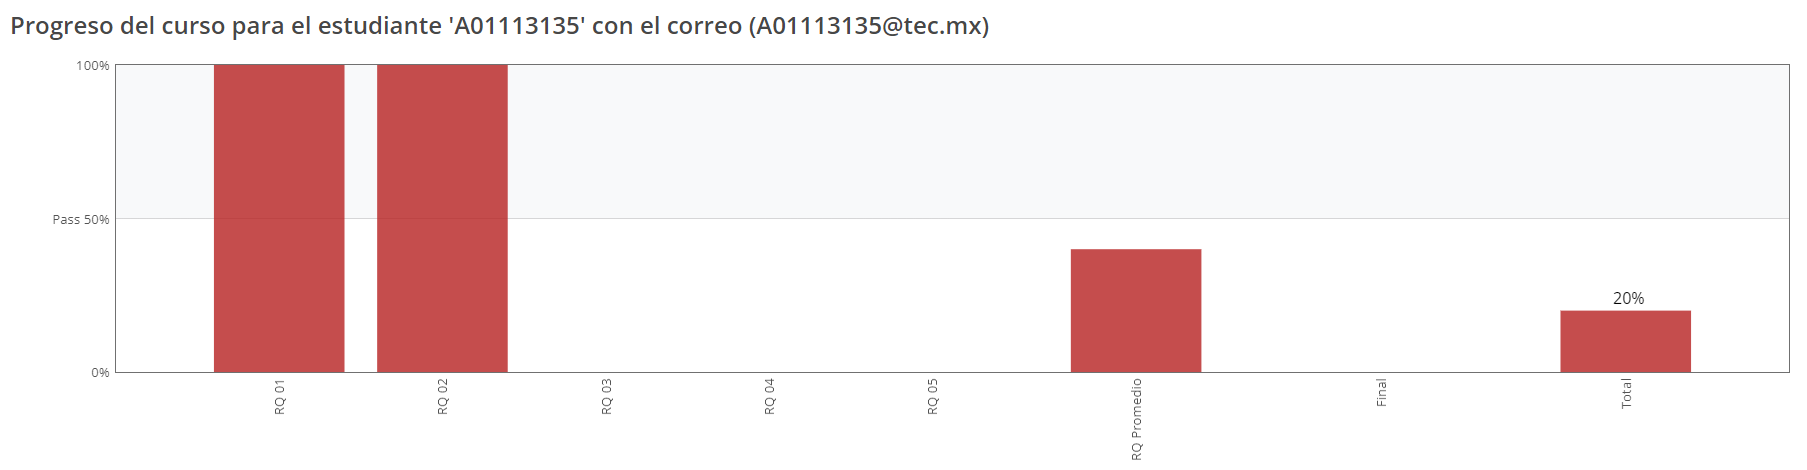